In [ ]:
from pricing import BlackScholesPricer, TrinomialTree, Market, Option
from pricing.convergence import *
import datetime as dt
import sys
# limite de récursion modifée
sys.setrecursionlimit(100000)

# parametrage de l'arbre
market = Market(S0=100, r=0.05, sigma=0.30, dividend=0, dividend_date=dt.date(2026, 4, 21))
option = Option(K=102, option_type="call", maturity=dt.date(2026, 9, 1), option_class="american")
tree = TrinomialTree(market, N=700, pruning=True, epsilon=1e-10, pricing_date = dt.date(2025, 9, 1))

# prix de l'arbre
price = tree.price(option, compute_greeks=True, activate_timer=True)
print("Prix de l’option:", price)

[Timer] Pricing exécuté en 0.4221 secondes.
Prix de l’option: 11.936084779553795
Black-Scholes Price: 11.593303805455307


# Black-Scholes

In [ ]:
bs = BlackScholesPricer(S=market.S0, K=option.K, T=tree.delta_t * tree.N, r=market.r, sigma=market.sigma, option_type=option.option_type, dividend=market.dividend, dividend_date = market.dividend_date)
bs_price = bs.price()
print(f"Black-Scholes Price: {bs_price}")

# Graphique de l'arbre

In [ ]:
tree.plot_tree(tree.N)

# Graphique de Convergence et d'Erreur

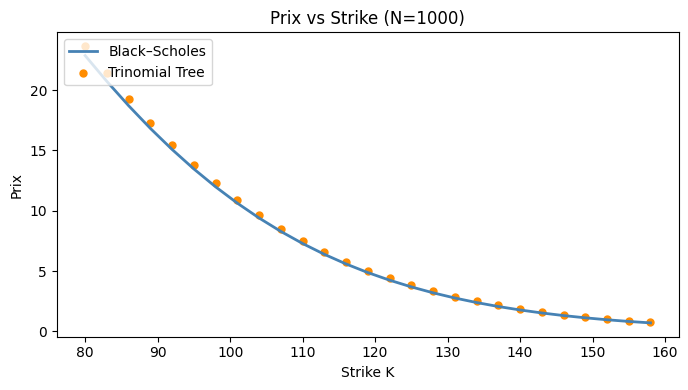

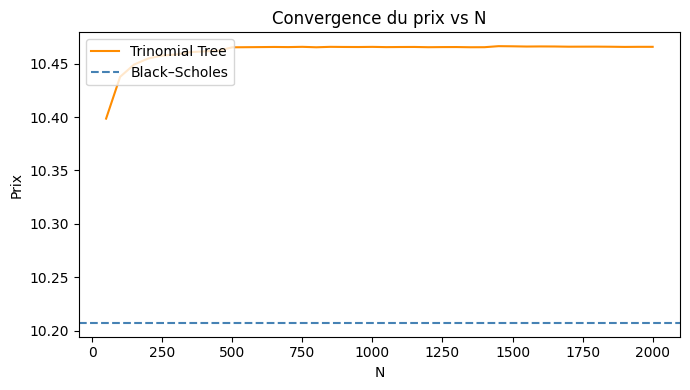

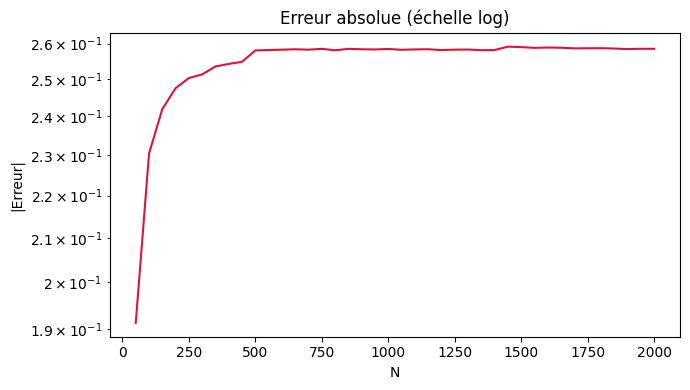

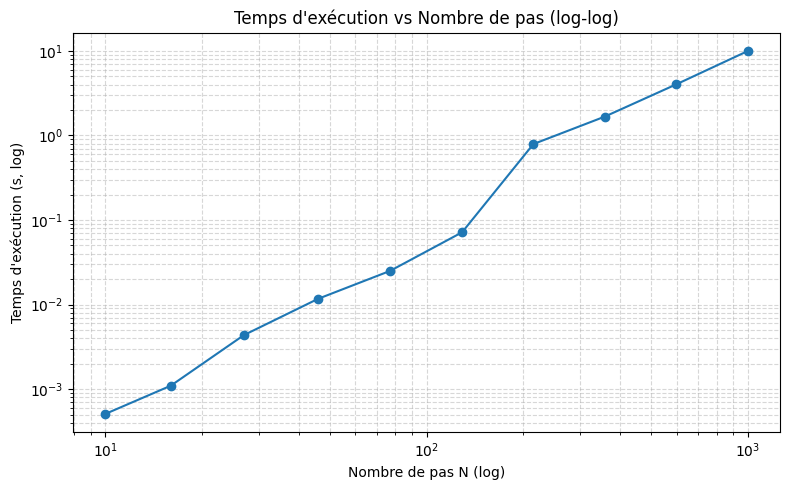

In [2]:
bs_convergence_by_strike(market, option, strikes=range(80, 161, 3), n_steps=1000)
bs_convergence_by_step(market, option, max_n=2000, step=50, pruning=True)
plot_runtime_vs_steps(market, option, N_values = np.logspace(1, 3, 10, dtype=int))

# Grecques - Arbre Trinomial

In [3]:
print(f"Delta : {tree.delta():.6f}")
print(f"Gamma : {tree.gamma():.6f}")
print(f"Vega  : {tree.vega(option):.6f}")   # déjà par 1% de vol
print(f"Vanna : {tree.vanna(option):.6f}")  # déjà par 1% de vol
print(f"Rho   : {tree.rho(option):.6f}")    # déjà par 1% de taux

Delta : 0.568265
Gamma : 0.013622
Vega  : 0.386695
Vanna : 0.001568
Rho   : 0.397101


# Grecques - Black-Scholes

In [4]:
bs.greeks()

{'delta': 0.5437897013651827,
 'gamma': 0.013146339123137552,
 'theta': -0.021593823518433846,
 'vega': 0.3828308178450136,
 'rho': 0.4278566633106296,
 'vanna': 0.0019522389154307315}